In [89]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import pickle
import sklearn

In [90]:
data_module= pd.read_csv("test.csv")
data_module.head()

,registered,cnt
0,3,7
1,4,5
2,662,743
3,163,208
4,250,333


In [91]:
# separate labels and features
x_test=data_module.iloc[:,:-1].values
y_test=data_module.iloc[:,1].values

In [92]:
print(x_test.shape)
print(y_test.shape)

(5214, 1)
(5214,)


In [93]:
regressor= SVR(kernel='rbf')
regressor.fit(x_test,y_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
predict test [2.56099656 3.58915044 1.5637897  ... 1.5637897  1.5637897  1.5637897 ]
accuracy test data: 96.38928453675439


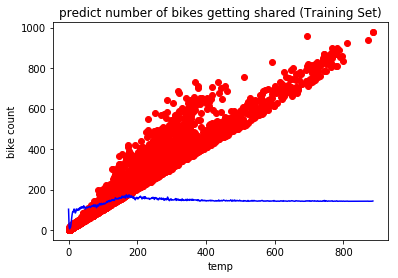

In [95]:
class Testing:
    def linear_module(self,x_test,y_test):
   
        regression = regressor.fit(x_test,y_test)
        return regression 
    
    def predict_model(self,regression,x_test):
        predict_test= regression.predict(x_test)
        return predict_test
    
    def accuracy(self,y_test,predict_test):
#         accuracy = sklearn.metrics.r2_score(y_test,predict_test)
#         accuracy = (1-accuracy)
        
#         return accuracy
#         accuracy= median_absolute_error(y_test,predict_test)*100
#         return accuracy
        total_error = mean_absolute_error(y_test, predict_test)
        accuracy = ( 1 - total_error/ len(y_test)) *100
        return accuracy
#         accuracy= median_absolute_error(y_test, predict_test)
#         return accuracy
    def visualization_test(self,x_test,y_test,predict_test):
         #visualizing the train result
        x_grid=np.arange(min(x_test),max(x_test),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_test,y_test,color='red')
        plt.plot(x_grid,regressor.predict(x_grid),color='blue')
        plt.title('predict number of bikes getting shared (Training Set)')
        plt.xlabel('temp')
        plt.ylabel('bike count')
        plt.show()


def main():
    obj = Testing()
    regression = obj.linear_module(x_test,y_test)
    print(regression)
        #cross validation
    file1 = open("SupportVector.pkl","rb")
    reg1 = pickle.load(file1)
    file1.close()
    
    predict_test= obj.predict_model(reg1,x_test)
    print("predict test",predict_test)
    
    accuracy = obj.accuracy(y_test,predict_test)
    print("accuracy test data:",accuracy)
   
    obj.visualization_test(x_test,y_test,predict_test)
    
if __name__ == '__main__':
    main()
